# Register_No: 212021
# Date:22/06/22
# Program Title:
# Dataset: HR ANALYTICS 

# 1. Data Preprocessing

## IMPORTING PACKAGES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.stats import skew
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv("hr_data.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low


In [6]:
df.drop(['is_smoker','work_accident'],axis=1,inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,yes,0,sales,low
1,0.80,0.86,5,262.0,6.0,yes,0,sales,medium
2,0.11,0.88,7,272.0,4.0,yes,0,sales,medium
3,0.72,0.87,5,223.0,5.0,yes,0,sales,low
4,0.37,0.52,2,NaN,NaN,yes,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3.0,yes,0,support,low
14995,0.37,0.48,2,160.0,3.0,yes,0,support,low
14996,0.37,0.53,2,143.0,3.0,yes,0,support,low
14997,0.11,0.96,6,280.0,4.0,yes,0,support,low


In [7]:

df1=df.set_index("salary")
hr=df1.drop("medium")

In [8]:
hr['salary'] = hr.index
hr.reset_index(drop=True, inplace=True)
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,yes,0,sales,low
1,0.72,0.87,5,223.0,5.0,yes,0,sales,low
2,0.37,0.52,2,NaN,NaN,yes,0,sales,low
3,0.41,0.50,2,NaN,NaN,yes,0,sales,low
4,0.10,0.77,6,247.0,4.0,yes,0,sales,low
...,...,...,...,...,...,...,...,...,...
8548,0.40,0.57,2,151.0,3.0,yes,0,support,low
8549,0.37,0.48,2,160.0,3.0,yes,0,support,low
8550,0.37,0.53,2,143.0,3.0,yes,0,support,low
8551,0.11,0.96,6,280.0,4.0,yes,0,support,low


In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     8553 non-null   float64
 1   last_evaluation        8553 non-null   float64
 2   number_project         8553 non-null   int64  
 3   average_montly_hours   8335 non-null   float64
 4   time_spend_company     8458 non-null   float64
 5   left                   8553 non-null   object 
 6   promotion_last_5years  8553 non-null   int64  
 7   department             8553 non-null   object 
 8   salary                 8553 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 601.5+ KB


# HANDLING MISSING VALUES

In [10]:
hr.isnull().sum()

satisfaction_level         0
last_evaluation            0
number_project             0
average_montly_hours     218
time_spend_company        95
left                       0
promotion_last_5years      0
department                 0
salary                     0
dtype: int64

In [11]:
hr['average_montly_hours'].median()


199.0

In [12]:

hr['time_spend_company'].median()


3.0

In [13]:
hr.fillna(hr.median(),inplace=True)
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [14]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3.0,yes,0,sales,low
1,0.72,0.87,5,223.0,5.0,yes,0,sales,low
2,0.37,0.52,2,199.0,3.0,yes,0,sales,low
3,0.41,0.50,2,199.0,3.0,yes,0,sales,low
4,0.10,0.77,6,247.0,4.0,yes,0,sales,low
...,...,...,...,...,...,...,...,...,...
8548,0.40,0.57,2,151.0,3.0,yes,0,support,low
8549,0.37,0.48,2,160.0,3.0,yes,0,support,low
8550,0.37,0.53,2,143.0,3.0,yes,0,support,low
8551,0.11,0.96,6,280.0,4.0,yes,0,support,low


In [15]:
data=hr

# OUTLIERS

# To check for Outliers

In [16]:
#Extracting only the numeric data from the main data and storing it in a variable.
hr_num=hr.select_dtypes(['int64','float64'])
hr_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,0.53,2,157.0,3.0,0
1,0.72,0.87,5,223.0,5.0,0
2,0.37,0.52,2,199.0,3.0,0
3,0.41,0.50,2,199.0,3.0,0
4,0.10,0.77,6,247.0,4.0,0
...,...,...,...,...,...,...
8548,0.40,0.57,2,151.0,3.0,0
8549,0.37,0.48,2,160.0,3.0,0
8550,0.37,0.53,2,143.0,3.0,0
8551,0.11,0.96,6,280.0,4.0,0


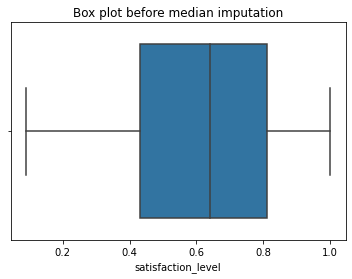

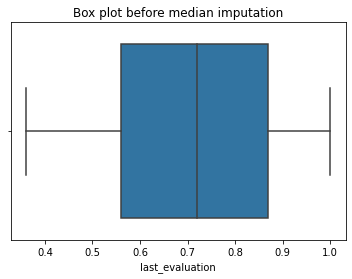

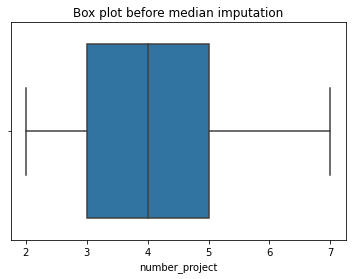

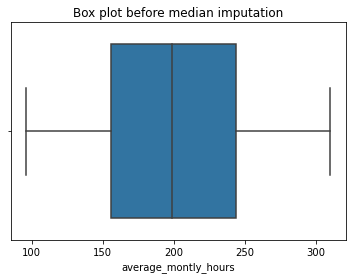

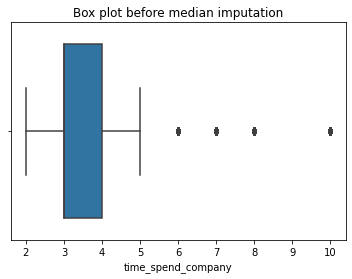

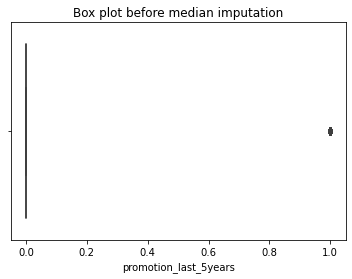

In [17]:
for i in hr_num:
    sns.boxplot(hr_num[i])
    plt.title("Box plot before median imputation")
    plt.show()



#### We observe that colums 'time_spend_company','work_accident' and 'promotion_last_5years' has outliers.since these are numerical data we treat this outliers using median impution method.

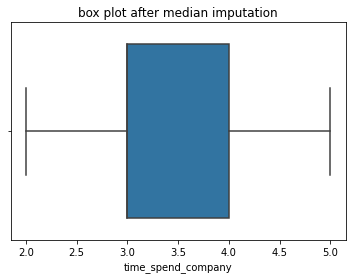

In [18]:
q1 =hr_num['time_spend_company'].quantile(0.25)
q3 =hr_num['time_spend_company'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(hr_num['time_spend_company'])
for i in hr['time_spend_company']:
    if i>upper_trial or i<lower_trial:
        hr_num['time_spend_company']=hr_num['time_spend_company'].replace(i,med)
sns.boxplot(hr_num['time_spend_company'])
plt.title("box plot after median imputation")
plt.show()

<AxesSubplot:xlabel='promotion_last_5years'>

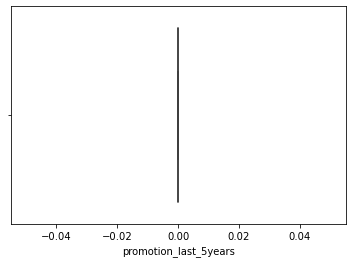

In [19]:
q1 =hr_num['promotion_last_5years'].quantile(0.25)
q3 =hr_num['promotion_last_5years'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(hr_num['promotion_last_5years'])
for i in hr_num['promotion_last_5years']:
    if i>upper_trial or i<lower_trial:
        hr_num['promotion_last_5years']=hr_num['promotion_last_5years'].replace(i,med)
sns.boxplot(hr_num['promotion_last_5years'])

# SKEWNESS

satisfaction_level
-0.4403426113826815


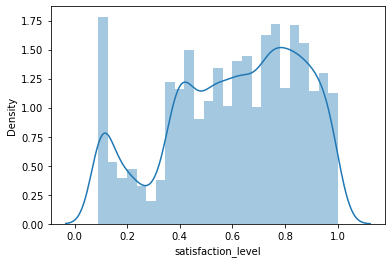

last_evaluation
-0.02074424090279777


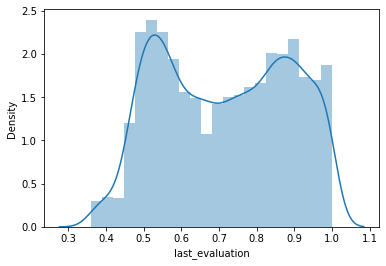

number_project
0.32295181725440436


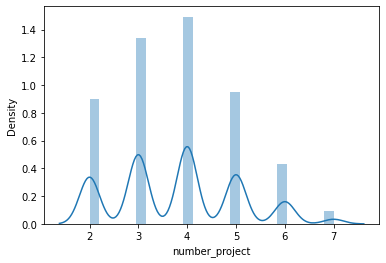

average_montly_hours
0.08212469857796638


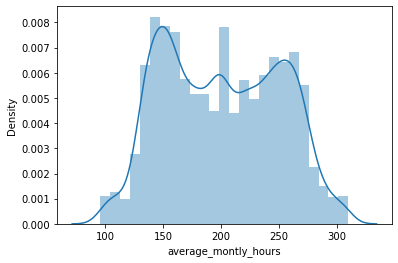

time_spend_company
0.6010877402940503


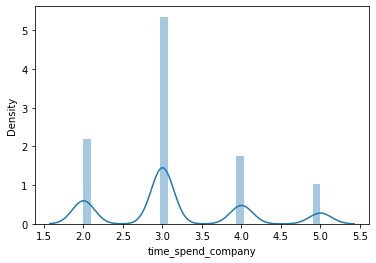

promotion_last_5years
0.0


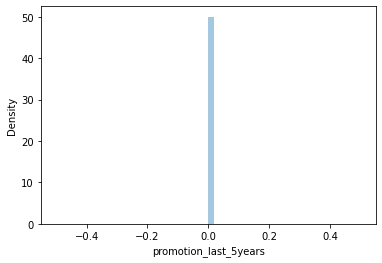

In [20]:
#hm=hr.select_dtypes(['int64','float64'])
for i in hr_num:
    print(i)
    print(skew(hr_num[i]))
    plt.figure()
    sns.distplot(hr_num[i])
    plt.show()

### we observe that skewness value for all the columns of the given hr data is between -0.5 to +0.5 except for the column 'time_spend_company' which is greater than 0.5.

In [21]:
#Removing skewnesss 

hr_num['time_spend_company'] =np.log(hr_num['time_spend_company'])

#view normalized DataFrame 
hr_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,0.53,2,157.0,1.098612,0
1,0.72,0.87,5,223.0,1.609438,0
2,0.37,0.52,2,199.0,1.098612,0
3,0.41,0.50,2,199.0,1.098612,0
4,0.10,0.77,6,247.0,1.386294,0
...,...,...,...,...,...,...
8548,0.40,0.57,2,151.0,1.098612,0
8549,0.37,0.48,2,160.0,1.098612,0
8550,0.37,0.53,2,143.0,1.098612,0
8551,0.11,0.96,6,280.0,1.386294,0


In [22]:
hr_num.skew(axis=0,skipna=True)

satisfaction_level      -0.440420
last_evaluation         -0.020748
number_project           0.323008
average_montly_hours     0.082139
time_spend_company       0.005640
promotion_last_5years    0.000000
dtype: float64

## Standardization

In [23]:
#Standardization
x = hr_num.iloc[:,0:4]
hr_num.iloc[:,0:4]= (x-x.mean())/x.std()
hr_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,-0.900352,-1.081237,-1.429583,-0.876711,1.098612,0
1,0.453780,0.903951,0.959480,0.448706,1.609438,0
2,-0.940179,-1.139625,-1.429583,-0.033264,1.098612,0
3,-0.780869,-1.256401,-1.429583,-0.033264,1.098612,0
4,-2.015519,0.320072,1.755835,0.930676,1.386294,0
...,...,...,...,...,...,...
8548,-0.820697,-0.847686,-1.429583,-0.997203,1.098612,0
8549,-0.940179,-1.373177,-1.429583,-0.816465,1.098612,0
8550,-0.940179,-1.081237,-1.429583,-1.157860,1.098612,0
8551,-1.975691,1.429441,1.755835,1.593385,1.386294,0


##  Normalization

In [24]:
x = hr_num.iloc[:,0:4]
hr_num.iloc[:,0:4]= (x-x.min())/ (x.max() - x.min())
#view normalized DataFrame 
hr_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,0.318681,0.265625,0.0,0.285047,1.098612,0
1,0.692308,0.796875,0.6,0.593458,1.609438,0
2,0.307692,0.250000,0.0,0.481308,1.098612,0
3,0.351648,0.218750,0.0,0.481308,1.098612,0
4,0.010989,0.640625,0.8,0.705607,1.386294,0
...,...,...,...,...,...,...
8548,0.340659,0.328125,0.0,0.257009,1.098612,0
8549,0.307692,0.187500,0.0,0.299065,1.098612,0
8550,0.307692,0.265625,0.0,0.219626,1.098612,0
8551,0.021978,0.937500,0.8,0.859813,1.386294,0


#  Multicollinearity

### Finding the correlation value

In [25]:
data['left'] = data['left'].map({'yes':0, 'no':1})
data['salary'] = data['salary'].map({'low':0, 'high':1})
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.107786,-0.136768,-0.018997,-0.095561,0.393271,0.015831,0.051437
last_evaluation,0.107786,1.000000,0.378095,0.363798,0.147830,0.002944,-0.024140,-0.026067
number_project,-0.136768,0.378095,1.000000,0.426502,0.198059,-0.012832,-0.019756,-0.009163
average_montly_hours,-0.018997,0.363798,0.426502,1.000000,0.137054,-0.062987,-0.018088,-0.010941
time_spend_company,-0.095561,0.147830,0.198059,0.137054,1.000000,-0.160810,0.108652,0.062041
left,0.393271,0.002944,-0.012832,-0.062987,-0.160810,1.000000,0.047115,0.184101
promotion_last_5years,0.015831,-0.024140,-0.019756,-0.018088,0.108652,0.047115,1.000000,0.137303
salary,0.051437,-0.026067,-0.009163,-0.010941,0.062041,0.184101,0.137303,1.000000


In [26]:
corelation=hr.corr()

<AxesSubplot:>

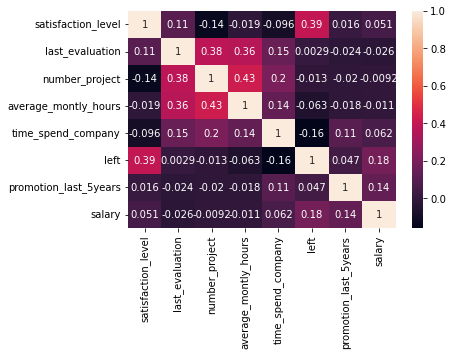

In [27]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

##### CONCLUSION
###### Since the VIF factor is less than 5 for the given variables there is no collinearity between the variables.

## CLASS IMBALANCE

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
data['left'].value_counts()


1    6299
0    2254
Name: left, dtype: int64

In [31]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
left                       int64
promotion_last_5years      int64
department                object
salary                     int64
dtype: object

In [32]:
data=pd.get_dummies(hr)

In [33]:
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours      float64
time_spend_company        float64
left                        int64
promotion_last_5years       int64
salary                      int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [34]:
q=data.drop(['left'],axis=1)
w=data['left']
print(q.shape)
print(w.shape)

(8553, 17)
(8553,)


In [36]:
q=data.drop(['left'],axis=1)
w=data['left']
q_resampled , w_resampled = SMOTE().fit_resample(q,w)

In [37]:
w_resampled.value_counts()

0    6299
1    6299
Name: left, dtype: int64